In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
tf.config.list_physical_devices('GPU')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding, Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Precision, Recall

In [2]:
df = pd.read_parquet('clean_data.pqt')

In [3]:
X= df['comment_text']
y= df.drop(['id','comment_text'], axis=1)
print(y)

X_train, X_valid, ytrain, yvalid = train_test_split(X,y,test_size=.3, random_state=77)
print(X_train.shape[0])
print(X_valid.shape[0]) 

        toxic  severe_toxic  obscene  threat  insult  identity_hate
0           0             0        0       0       0              0
1           0             0        0       0       0              0
2           0             0        0       0       0              0
3           0             0        0       0       0              0
4           0             0        0       0       0              0
...       ...           ...      ...     ...     ...            ...
159566      0             0        0       0       0              0
159567      0             0        0       0       0              0
159568      0             0        0       0       0              0
159569      0             0        0       0       0              0
159570      0             0        0       0       0              0

[159571 rows x 6 columns]
111699
47872


In [4]:
MAX_VOCAB_SIZE = 200000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_valid = tokenizer.texts_to_sequences(X_valid)

In [5]:
word2idx = tokenizer.word_index
V = len(word2idx)
print(V)

150507


In [6]:
data_train = pad_sequences(sequences_train)
print(data_train.shape)
T= data_train.shape[1]
data_valid = pad_sequences(sequences_valid, maxlen=T)
print(data_valid.shape)

(111699, 1250)
(47872, 1250)


In [7]:
D=60
M= 35

i = Input(shape=(T,))
x= Embedding(V+1, D) (i)
x= LSTM(M, return_sequences=True)(x)
x= GlobalMaxPooling1D()(x)
x= Dense(6, activation='softmax')(x)

model= Model(i,x)

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[ 'accuracy',Recall(name='recall'),Precision(name='precision')])

r= model.fit(data_train, ytrain, epochs=20, validation_data=(data_valid, yvalid))

Epoch 1/20
3491/3491 [==============================] - 199s 55ms/step - loss: 0.0931 - accuracy: 0.9448 - recall: 0.2219 - precision: 0.0712 - val_loss: 0.0559 - val_accuracy: 0.9939 - val_recall: 0.4152 - val_precision: 0.0918
Epoch 2/20
3491/3491 [==============================] - 189s 54ms/step - loss: 0.0484 - accuracy: 0.9936 - recall: 0.4218 - precision: 0.0969 - val_loss: 0.0505 - val_accuracy: 0.9927 - val_recall: 0.4161 - val_precision: 0.0989
Epoch 3/20
3491/3491 [==============================] - 190s 54ms/step - loss: 0.0397 - accuracy: 0.9936 - recall: 0.4311 - precision: 0.1018 - val_loss: 0.0506 - val_accuracy: 0.9926 - val_recall: 0.4264 - val_precision: 0.1007
Epoch 4/20
3491/3491 [==============================] - 189s 54ms/step - loss: 0.0336 - accuracy: 0.9907 - recall: 0.4330 - precision: 0.0998 - val_loss: 0.0532 - val_accuracy: 0.9895 - val_recall: 0.4310 - val_precision: 0.0999
Epoch 5/20
3491/3491 [==============================] - 189s 54ms/step - loss: 0.029

In [9]:
def history_plots(redux, metric):
    valid = "val_"+metric
    plt.plot(redux.history[metric], label=metric)
    plt.plot(redux.history[valid], label=valid)
    plt.legend()
    plt.show()

In [10]:
def f1_derive(hist=r,prc='precision',rcl='recall'):
    vp= 'val_'+prc
    v_re= 'val_'+rcl
    CH_hist= pd.DataFrame(hist.history)
    CH_hist['f1'] =(2*CH_hist[prc]*CH_hist[rcl])/(CH_hist[prc]+CH_hist[rcl])
    CH_hist['val_f1'] =(2*CH_hist[vp]*CH_hist[vp])/(CH_hist[vp]+CH_hist[vp])
    CH_hist.fillna(0,inplace=True)

    plt.plot(CH_hist['f1'], label='f1')
    plt.plot(CH_hist['val_f1'], label='val_f1')
    plt.legend()
    plt.show()

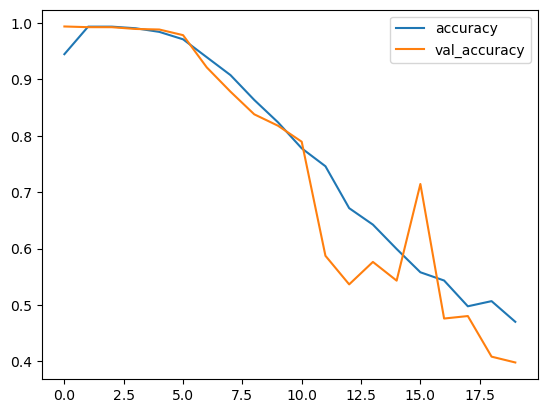

In [11]:
history_plots(r,'accuracy')

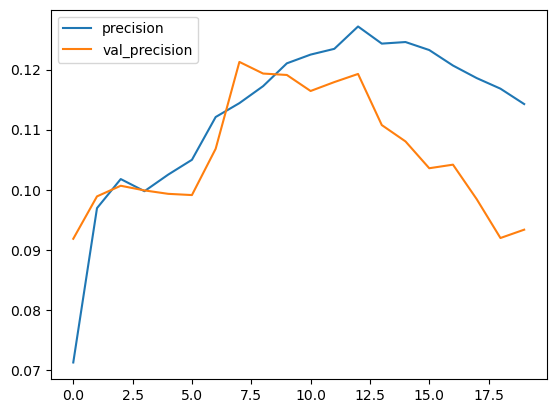

In [12]:
history_plots(r,'precision')

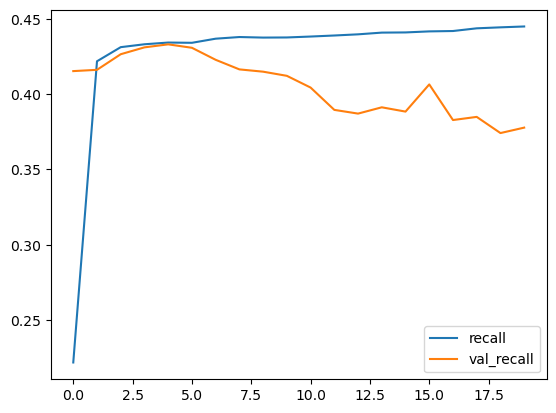

In [13]:
history_plots(r,'recall')

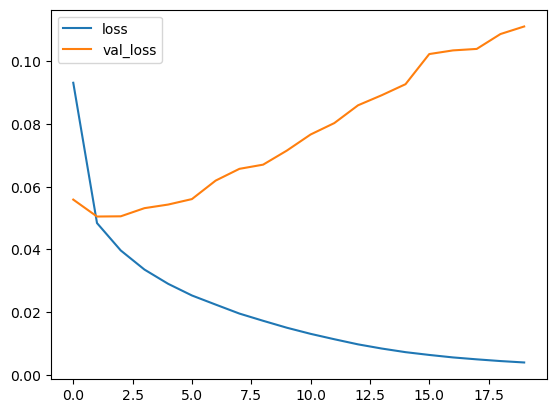

In [14]:
history_plots(r,'loss')

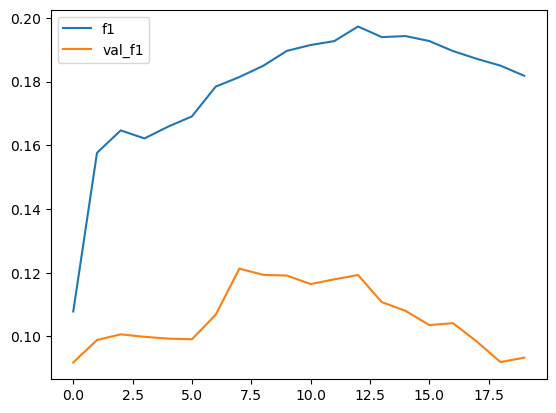

In [15]:
f1_derive(r,'precision','recall')

In [17]:
D=60
M= 32

i = Input(shape=(T,))
x= Embedding(V+1, D) (i)
x= LSTM(M, return_sequences=True)(x)
x= GlobalMaxPooling1D()(x)
x= Dense(6, activation='softmax')(x)

model2= Model(i,x)

In [19]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=[ 'accuracy',Recall(name='recall'),Precision(name='precision')])

p= model2.fit(data_train, ytrain, epochs=20, validation_data=(data_valid, yvalid))

Epoch 1/20
3491/3491 [==============================] - 185s 53ms/step - loss: 0.0800 - accuracy: 0.9935 - recall: 0.2950 - precision: 0.1131 - val_loss: 0.0512 - val_accuracy: 0.9943 - val_recall: 0.4316 - val_precision: 0.1425
Epoch 2/20
3491/3491 [==============================] - 180s 52ms/step - loss: 0.0429 - accuracy: 0.9939 - recall: 0.4333 - precision: 0.1252 - val_loss: 0.0488 - val_accuracy: 0.9941 - val_recall: 0.4336 - val_precision: 0.0962
Epoch 3/20
3491/3491 [==============================] - 180s 51ms/step - loss: 0.0350 - accuracy: 0.9929 - recall: 0.4347 - precision: 0.1157 - val_loss: 0.0505 - val_accuracy: 0.9889 - val_recall: 0.4290 - val_precision: 0.1294
Epoch 4/20
3491/3491 [==============================] - 179s 51ms/step - loss: 0.0293 - accuracy: 0.9804 - recall: 0.4345 - precision: 0.1172 - val_loss: 0.0530 - val_accuracy: 0.9552 - val_recall: 0.4298 - val_precision: 0.1331
Epoch 5/20
3491/3491 [==============================] - 179s 51ms/step - loss: 0.025

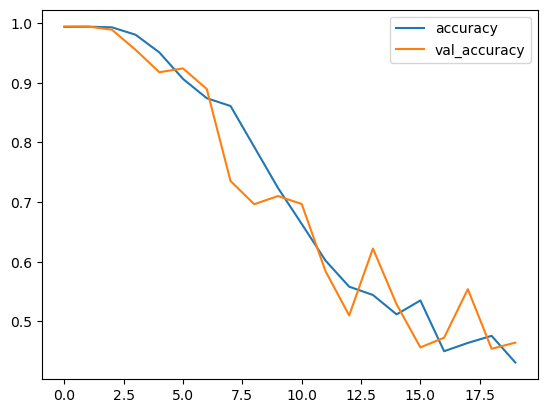

In [20]:
history_plots(p,'accuracy')

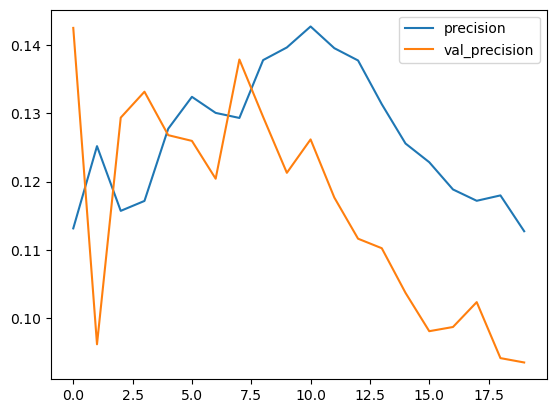

In [21]:
history_plots(p,'precision')

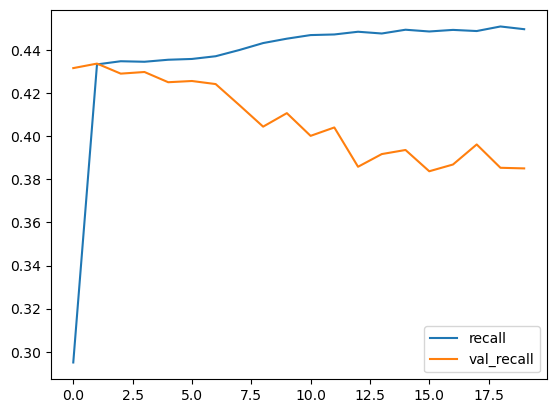

In [22]:
history_plots(p,'recall')

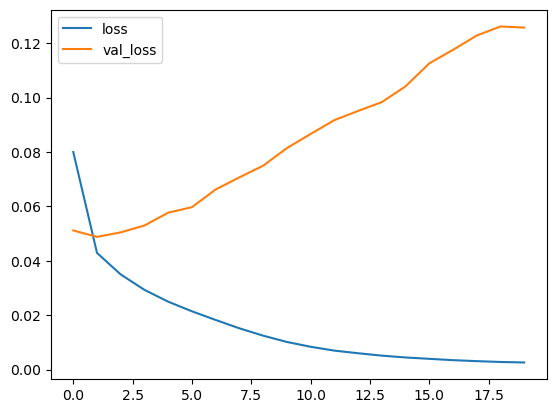

In [23]:
history_plots(p,'loss')

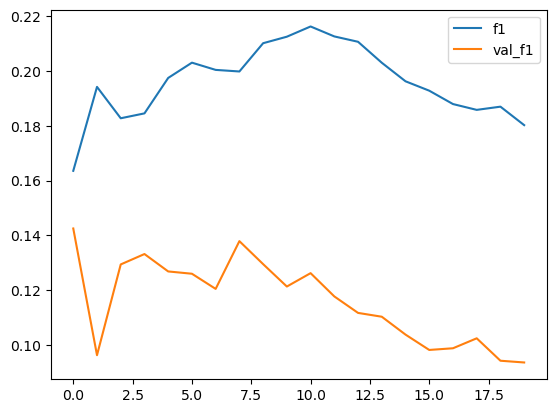

In [24]:
f1_derive(p,'precision','recall')

In [25]:
D=30
M= 32

i = Input(shape=(T,))
x= Embedding(V+1, D) (i)
x= LSTM(M, return_sequences=True)(x)
x= GlobalMaxPooling1D()(x)
x= Dense(6, activation='softmax')(x)

model3= Model(i,x)

In [26]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=[ 'accuracy',Recall(name='recall'),Precision(name='precision')])

q= model3.fit(data_train, ytrain, epochs=20, validation_data=(data_valid, yvalid))

Epoch 1/20
3491/3491 [==============================] - 170s 49ms/step - loss: 0.0960 - accuracy: 0.9640 - recall: 0.2559 - precision: 0.1396 - val_loss: 0.0514 - val_accuracy: 0.9941 - val_recall: 0.4301 - val_precision: 0.1125
Epoch 2/20
3491/3491 [==============================] - 173s 50ms/step - loss: 0.0449 - accuracy: 0.9847 - recall: 0.4195 - precision: 0.1276 - val_loss: 0.0496 - val_accuracy: 0.9943 - val_recall: 0.4335 - val_precision: 0.0996
Epoch 3/20
3491/3491 [==============================] - 175s 50ms/step - loss: 0.0374 - accuracy: 0.9796 - recall: 0.4308 - precision: 0.1472 - val_loss: 0.0523 - val_accuracy: 0.9823 - val_recall: 0.4301 - val_precision: 0.1594
Epoch 4/20
3491/3491 [==============================] - 171s 49ms/step - loss: 0.0324 - accuracy: 0.9142 - recall: 0.4333 - precision: 0.1668 - val_loss: 0.0536 - val_accuracy: 0.7508 - val_recall: 0.4123 - val_precision: 0.2158
Epoch 5/20
3491/3491 [==============================] - 169s 48ms/step - loss: 0.028

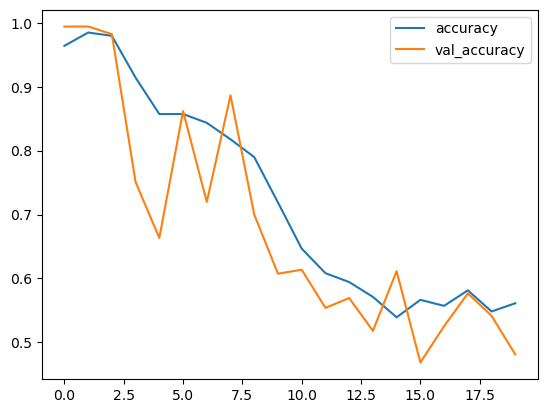

In [27]:
history_plots(q,'accuracy')

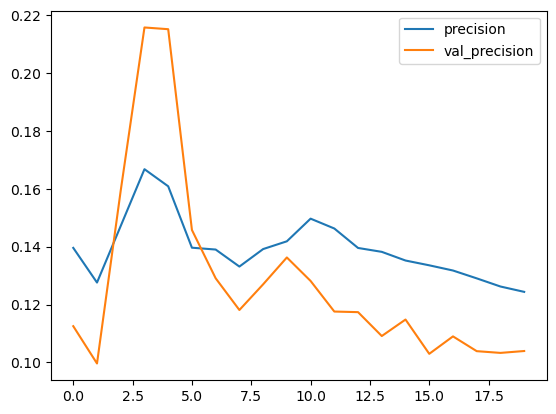

In [28]:
history_plots(q,'precision')

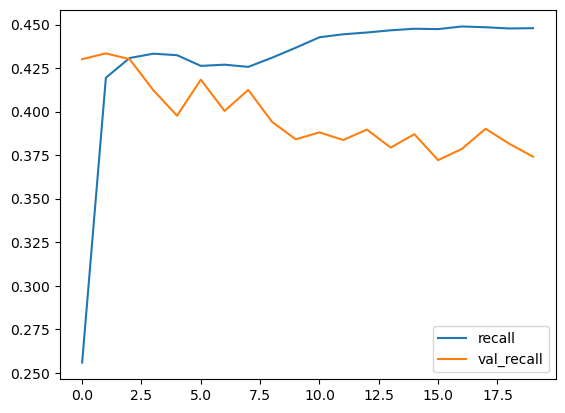

In [29]:
history_plots(q,'recall')

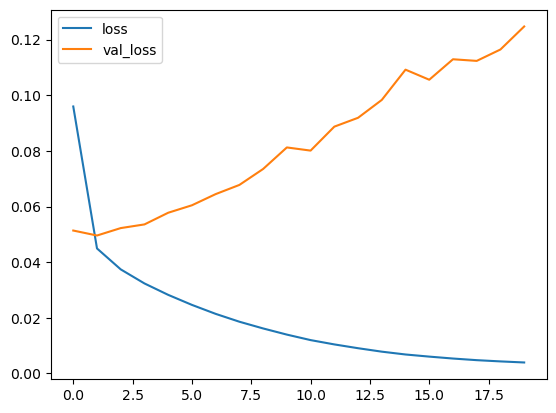

In [30]:
history_plots(q,'loss')

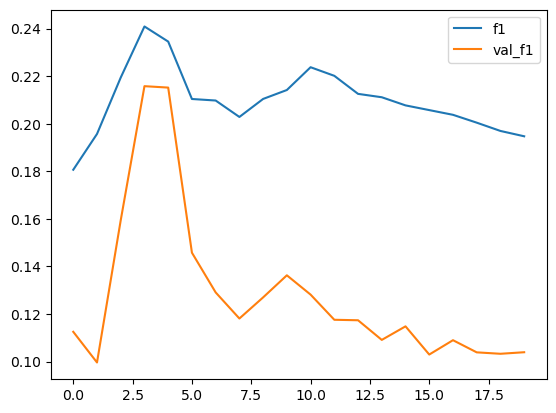

In [31]:
f1_derive(q,'precision','recall')

In [37]:
D=60
M= 35

i = Input(shape=(T,))
x= Embedding(V+1, D) (i)
x= LSTM(M, return_sequences=True)(x)
x= GlobalMaxPooling1D()(x)
x= Dense(6, activation='softmax')(x)

model5= Model(i,x)

In [40]:
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[ 'accuracy',Recall(name='recall'),Precision(name='precision')])

s= model5.fit(data_train, ytrain, epochs=20, validation_data=(data_valid, yvalid))

Epoch 1/20
3491/3491 [==============================] - 193s 55ms/step - loss: 0.3664 - accuracy: 0.0321 - recall: 8.9562e-04 - precision: 0.8462 - val_loss: 0.3399 - val_accuracy: 0.0685 - val_recall: 0.0016 - val_precision: 0.6800
Epoch 2/20
3491/3491 [==============================] - 190s 54ms/step - loss: 0.3405 - accuracy: 0.0852 - recall: 0.0089 - precision: 0.6855 - val_loss: 0.3467 - val_accuracy: 0.1074 - val_recall: 1.8986e-04 - val_precision: 0.2500
Epoch 3/20
3491/3491 [==============================] - 188s 54ms/step - loss: 0.3554 - accuracy: 0.0894 - recall: 0.0759 - precision: 0.7537 - val_loss: 0.3697 - val_accuracy: 0.0948 - val_recall: 0.0702 - val_precision: 0.7191
Epoch 4/20
3491/3491 [==============================] - 189s 54ms/step - loss: 0.3687 - accuracy: 0.0790 - recall: 0.0984 - precision: 0.7560 - val_loss: 0.3731 - val_accuracy: 0.1014 - val_recall: 0.1285 - val_precision: 0.7160
Epoch 5/20
3491/3491 [==============================] - 189s 54ms/step - los

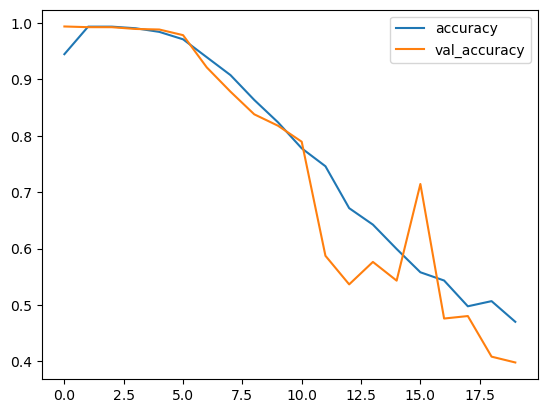

In [41]:
history_plots(r,'accuracy')

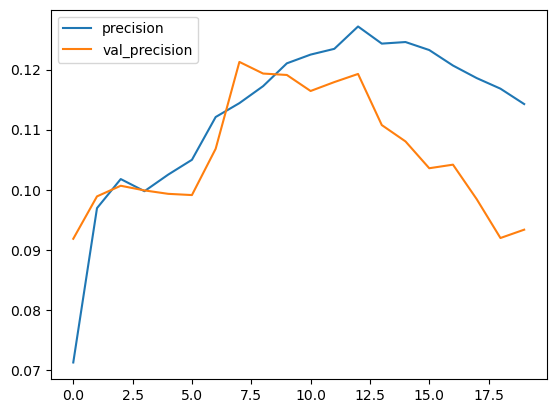

In [42]:
history_plots(r,'precision')

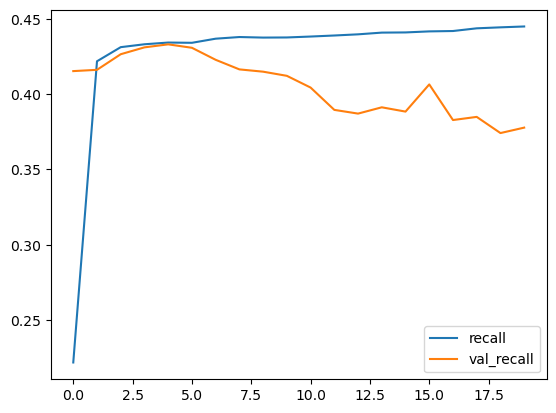

In [43]:
history_plots(r,'recall')

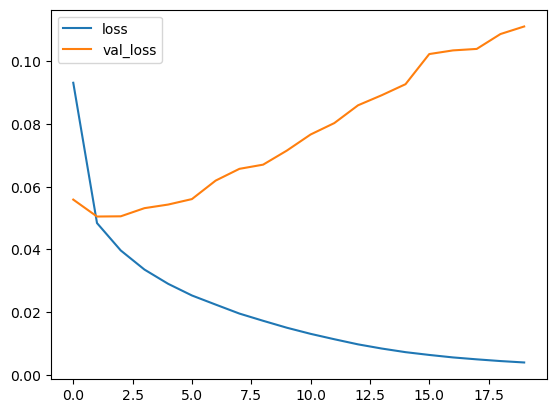

In [44]:
history_plots(r,'loss')

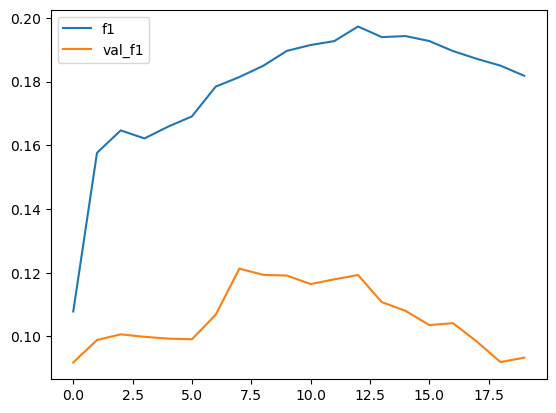

In [45]:
f1_derive(r,'precision','recall')

In [46]:
D=30
M= 32

i = Input(shape=(T,))
x= Embedding(V+1, D) (i)
x= LSTM(M, return_sequences=True)(x)
x= GlobalMaxPooling1D()(x)
x= Dense(6, activation='softmax')(x)

model3= Model(i,x)

In [47]:
model3.compile(loss="categorical_crossentropy", optimizer='adam', metrics=[ 'accuracy',Recall(name='recall'),Precision(name='precision')])

q= model3.fit(data_train, ytrain, epochs=20, validation_data=(data_valid, yvalid))

Epoch 1/20
3491/3491 [==============================] - 169s 48ms/step - loss: 0.3412 - accuracy: 0.0034 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3344 - val_accuracy: 0.0031 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/20
3491/3491 [==============================] - 167s 48ms/step - loss: 0.3325 - accuracy: 0.0033 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3306 - val_accuracy: 0.0031 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/20
3491/3491 [==============================] - 167s 48ms/step - loss: 0.3281 - accuracy: 0.0033 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3279 - val_accuracy: 0.0031 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/20
3491/3491 [==============================] - 167s 48ms/step - loss: 0.3249 - accuracy: 0.0048 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3266 - val_accuracy: 0.0031 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/20
3491/3491

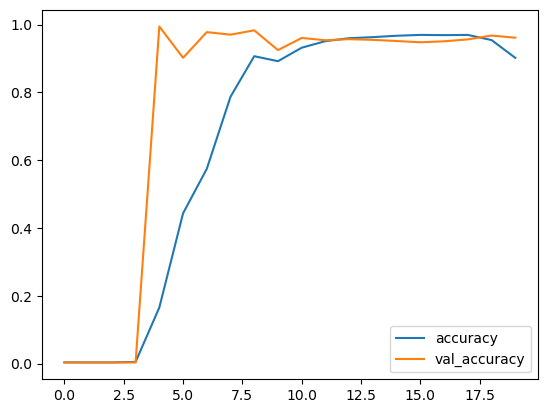

In [48]:
history_plots(q,'accuracy')

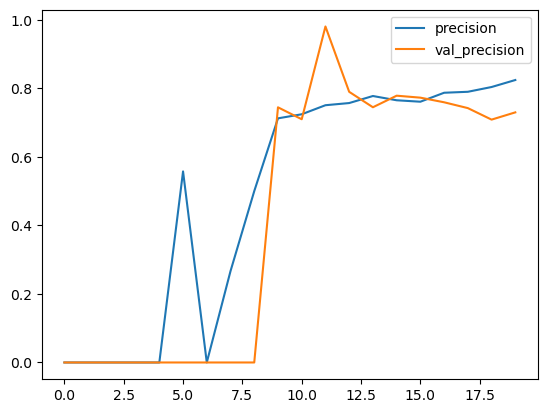

In [49]:
history_plots(q,'precision')

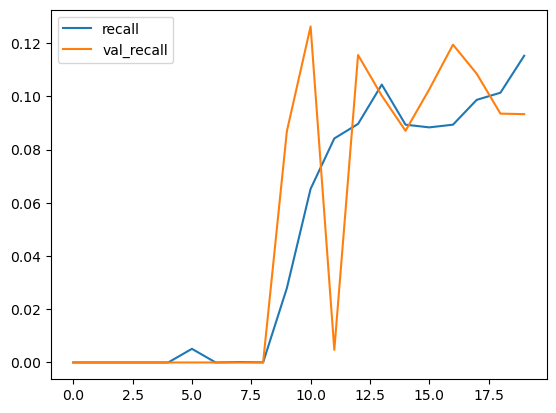

In [50]:
history_plots(q,'recall')

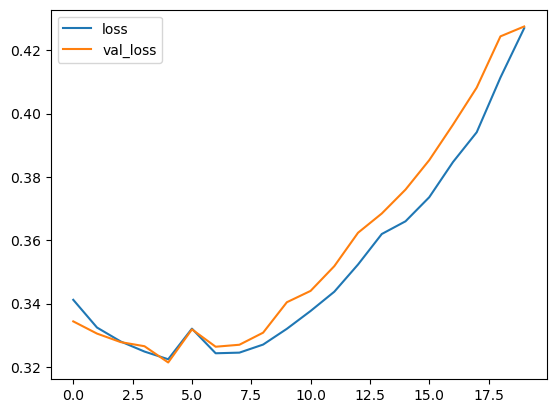

In [51]:
history_plots(q,'loss')

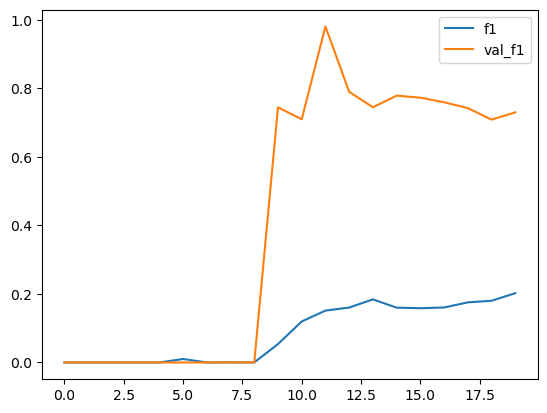

In [52]:
f1_derive(q,'precision','recall')

In [ ]:
D=30
M= 16

i = Input(shape=(T,))
x= Embedding(V+1, D) (i)
x= LSTM(M, return_sequences=True)(x)
x= GlobalMaxPooling1D()(x)
x= Dense(6, activation='softmax')(x)

model6= Model(i,x)

In [56]:
model6.compile(loss="categorical_crossentropy", optimizer='adam', metrics=[ 'accuracy',Recall(name='recall'),Precision(name='precision')])

t= model6.fit(data_train, ytrain, epochs=20, validation_data=(data_valid, yvalid))

Epoch 1/20
3491/3491 [==============================] - 169s 48ms/step - loss: 0.3706 - accuracy: 0.9358 - recall: 0.0897 - precision: 0.7663 - val_loss: 0.3672 - val_accuracy: 0.9250 - val_recall: 0.1143 - val_precision: 0.5536
Epoch 2/20
3491/3491 [==============================] - 160s 46ms/step - loss: 0.3651 - accuracy: 0.9382 - recall: 0.1002 - precision: 0.7835 - val_loss: 0.3738 - val_accuracy: 0.9391 - val_recall: 0.0950 - val_precision: 0.7135
Epoch 3/20
3491/3491 [==============================] - 159s 46ms/step - loss: 0.3698 - accuracy: 0.9419 - recall: 0.0917 - precision: 0.7994 - val_loss: 0.3769 - val_accuracy: 0.9442 - val_recall: 0.0990 - val_precision: 0.7238
Epoch 4/20
3491/3491 [==============================] - 160s 46ms/step - loss: 0.3743 - accuracy: 0.9494 - recall: 0.0847 - precision: 0.7961 - val_loss: 0.3836 - val_accuracy: 0.9580 - val_recall: 0.0865 - val_precision: 0.7419
Epoch 5/20
3491/3491 [==============================] - 160s 46ms/step - loss: 0.378

InternalError: Graph execution error:

Failed to call ThenRnnBackward with model config: [rnn_mode, rnn_input_mode, rnn_direction_mode]: 2, 0, 0 , [num_layers, input_size, num_units, dir_count, max_seq_length, batch_size, cell_num_units]: [1, 30, 16, 1, 1250, 32, 16] 
	 [[{{node gradients/CudnnRNN_grad/CudnnRNNBackprop}}]]
	 [[Adam/gradients/PartitionedCall]] [Op:__inference_train_function_3433784]

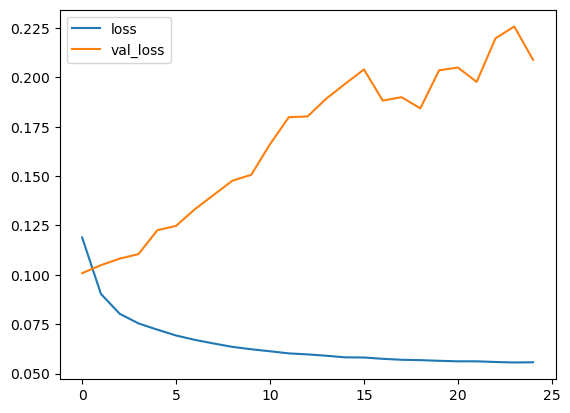

In [ ]:
history_plots(t,'loss')

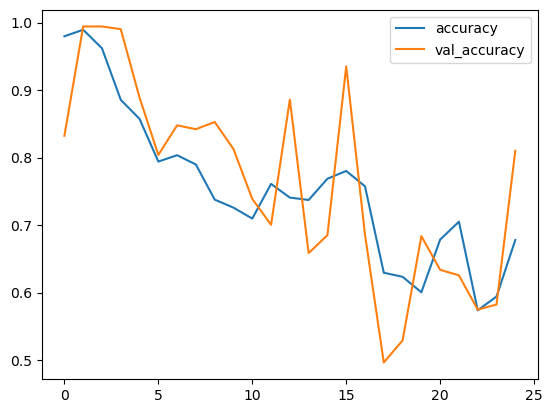

In [ ]:
history_plots(t,'accuracy')

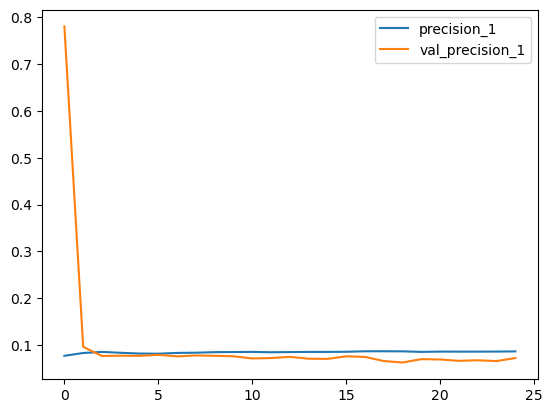

In [ ]:
history_plots(t,'precision')

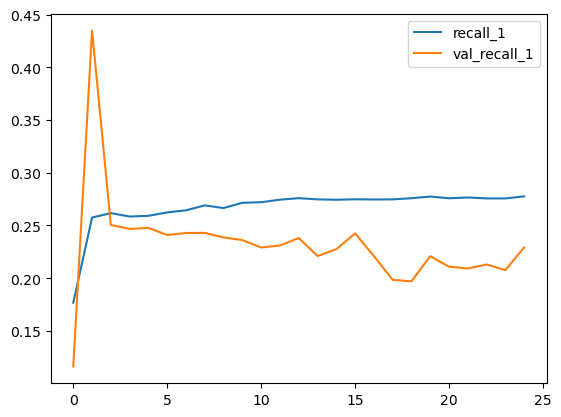

In [ ]:
history_plots(t,'recall')

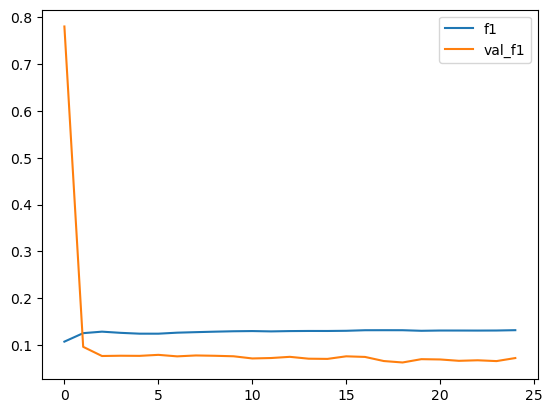

In [ ]:
f1_derive(t,'precision','recall')

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
D=30
M= 32

i = Input(shape=(T,))
x= Embedding(V+1, D) (i)
x= LSTM(M, return_sequences=True)(x)
x= GlobalMaxPooling1D()(x)
x= Dense(6, activation='softmax')(x)

model7= Model(i,x)

In [ ]:
model7.compile(loss="categorical_crossentropy", optimizer=Adam(lr=.0001), metrics=[ 'accuracy',Recall(name='recall'),Precision(name='precision')])

w= model7.fit(data_train, ytrain, epochs=20, validation_data=(data_valid, yvalid))

Epoch 1/20
3491/3491 [==============================] - 169s 48ms/step - loss: 0.3412 - accuracy: 0.0034 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3344 - val_accuracy: 0.0031 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/20
3491/3491 [==============================] - 167s 48ms/step - loss: 0.3325 - accuracy: 0.0033 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3306 - val_accuracy: 0.0031 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/20
3491/3491 [==============================] - 167s 48ms/step - loss: 0.3281 - accuracy: 0.0033 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3279 - val_accuracy: 0.0031 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/20
3491/3491 [==============================] - 167s 48ms/step - loss: 0.3249 - accuracy: 0.0048 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3266 - val_accuracy: 0.0031 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/20
3491/3491

In [ ]:
history_plots(w,'accuracy')

NameError: name 'w' is not defined

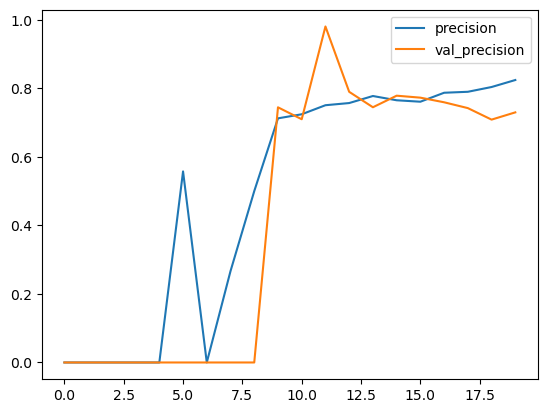

In [ ]:
history_plots(q,'precision')

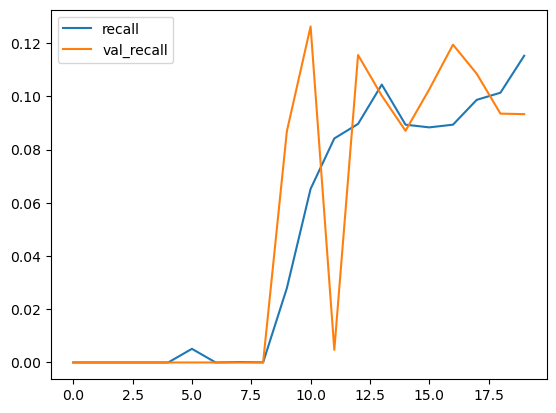

In [ ]:
history_plots(w,'recall')

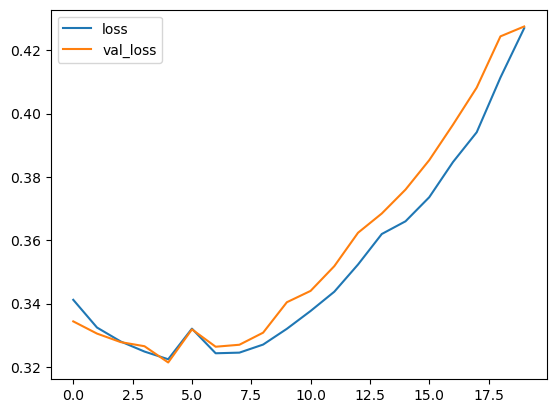

In [ ]:
history_plots(w,'loss')

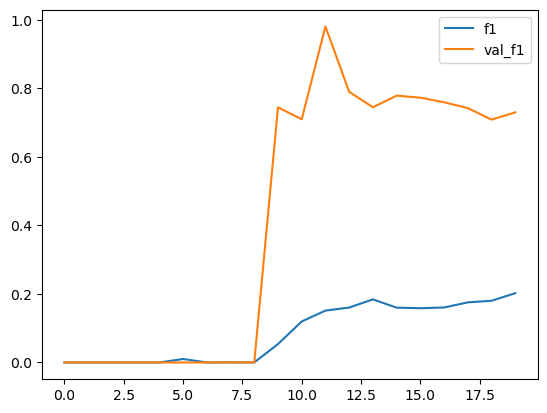

In [ ]:
f1_derive(w,'precision','recall')

In [ ]:
D=30
M= 32

i = Input(shape=(T,))
x= Embedding(V+1, D) (i)
x= LSTM(M, return_sequences=True)(x)
x= GlobalMaxPooling1D()(x)
x= Dense(6, activation='softmax')(x)

model3= Model(i,x)

In [ ]:
model3.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=[ 'accuracy',Recall(name='recall'),Precision(name='precision')])

q= model3.fit(data_train, ytrain, epochs=20, validation_data=(data_valid, yvalid))

Epoch 1/20
3491/3491 [==============================] - 169s 48ms/step - loss: 0.3412 - accuracy: 0.0034 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3344 - val_accuracy: 0.0031 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/20
3491/3491 [==============================] - 167s 48ms/step - loss: 0.3325 - accuracy: 0.0033 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3306 - val_accuracy: 0.0031 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/20
3491/3491 [==============================] - 167s 48ms/step - loss: 0.3281 - accuracy: 0.0033 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3279 - val_accuracy: 0.0031 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/20
3491/3491 [==============================] - 167s 48ms/step - loss: 0.3249 - accuracy: 0.0048 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3266 - val_accuracy: 0.0031 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/20
3491/3491

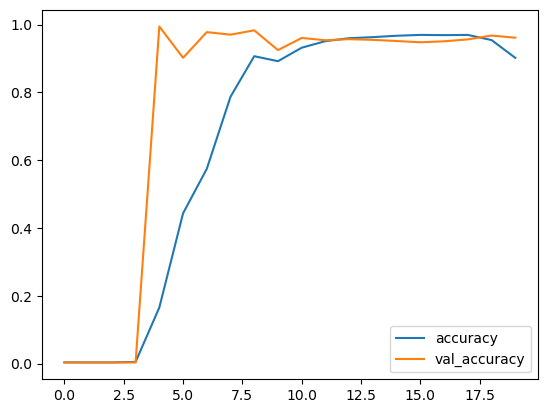

In [ ]:
history_plots(q,'accuracy')

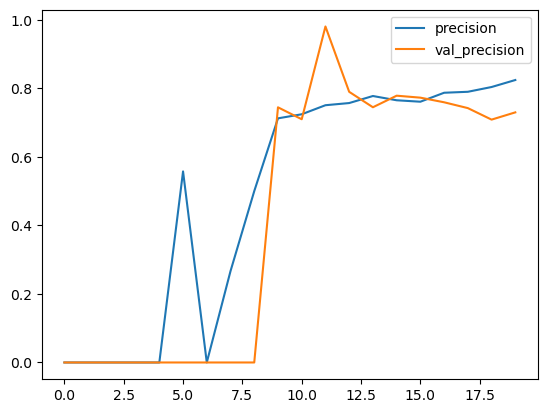

In [ ]:
history_plots(q,'precision')

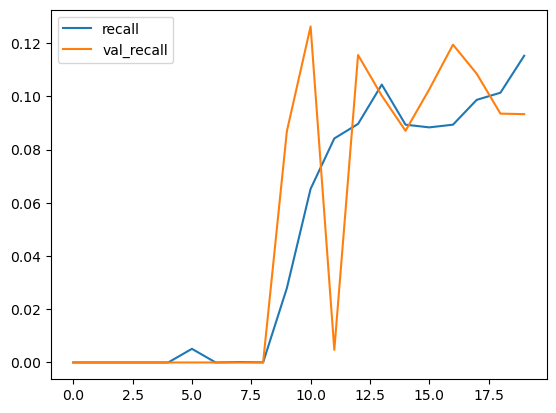

In [ ]:
history_plots(q,'recall')

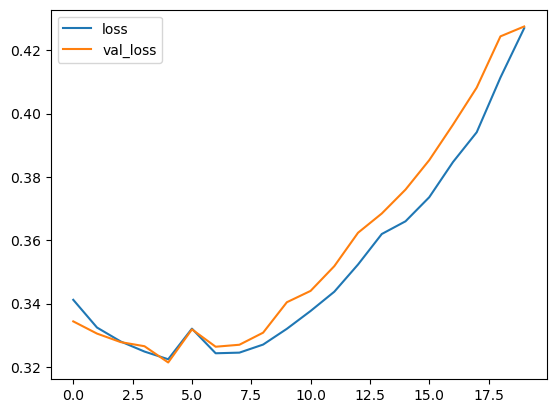

In [ ]:
history_plots(q,'loss')

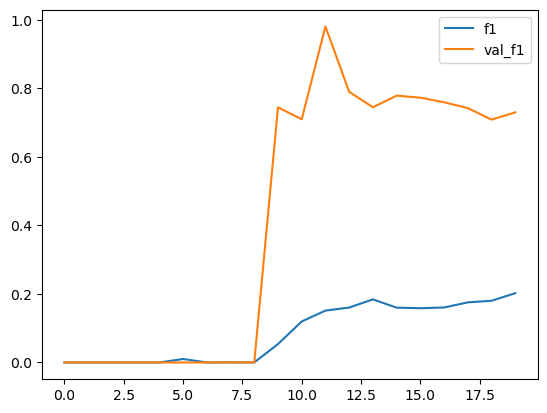

In [ ]:
f1_derive(q,'precision','recall')